In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/insurance.csv', sep=',',header=0)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
gender = {'male':0, 'female':1}
# replace sex column with 0/1
dataset['sex'] = dataset['sex'].map(gender)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:
smoke = {'no':0, 'yes':1}
# replace smokers column with 0/1
dataset['smoker'] = dataset['smoker'].map(smoke)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
reg = {'southwest':0, 'northwest':1,'southeast':11,'northeast':111}
# replace smokers column with 0/1
dataset['region'] = dataset['region'].map(reg)
print(dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    0  33.770         1       0      11   1725.55230
2      28    0  33.000         3       0      11   4449.46200
3      33    0  22.705         0       0       1  21984.47061
4      32    0  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0     111   2205.98080
1335   18    1  36.850         0       0      11   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [ ]:
dataset["class"]= dataset["charges"]> 10000
bool = {True:0,False:1}
# replace smokers column with 0/1
dataset['class'] = dataset['class'].map(bool)
dataset.head()

,age,sex,bmi,children,smoker,region,charges,class
0,19,1,27.900,0,1,0,16884.92400,0
1,18,0,33.770,1,0,11,1725.55230,1
2,28,0,33.000,3,0,11,4449.46200,1
3,33,0,22.705,0,0,1,21984.47061,0
4,32,0,28.880,0,0,1,3866.85520,1


In [ ]:
#output= dataset.iloc[:,6] # charges , the output 
input= dataset.iloc[:,:6]
output=dataset["class"]
print(input)
print(output)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0      11
2      28    0  33.000         3       0      11
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0     111
1335   18    1  36.850         0       0      11
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]
0       0
1       1
2       1
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    1
1337    0
Name: class, Length: 1338, dtype: int64


In [ ]:
input_train, input_test, output_train, output_test = train_test_split(input,output, test_size=0.2)

In [ ]:
LR = LogisticRegression(random_state=0, solver='newton-cg', multi_class='ovr').fit(input_train,output_train) #model 
pred=LR.predict(input_test)
print('Model score {} %'.format(round(LR.score(input_test,output_test)*100,4)))


Model score 92.1642 %


In [ ]:
# plot learning curve 
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(solver='newton-cg'),X = input,y = output,
                               scoring='neg_mean_squared_error', cv = 5)
train_scores_mean =- train_scores.mean(axis = 1)
validation_scores_mean =- validation_scores.mean(axis = 1)
print(train_scores_mean,validation_scores_mean)
train_sizes

[0.07476636 0.08645533 0.0914966  0.08854041 0.09308411] [0.14275812 0.1031388  0.10015652 0.09192241 0.09267147]


array([ 107,  347,  588,  829, 1070])

(0.0, 0.3)

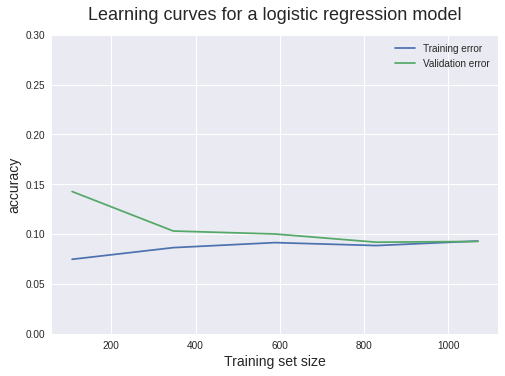

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.3)